# File for Producing Visuals Based on Data Gathered in Src

## Imports:

In [1]:
from helpers.helpers_endhost import extract_numbers_from_file, plot_endhost_execution_times
from helpers.helpers_p4 import parse_latency_file, chunk_by_1000, plot_endhost_execution_times 
from helpers.helpers_both import plot_p4_vs_endhost_execution_times

In [11]:
#ENDHOST FILE PREPARATION

filepath_endhost_rtt = "../src/telemetry/endhost/results/rtt_execution_time.txt"
filepath_endhost_packet_counting = "../src/telemetry/endhost/results/packet_counting_execution_time.txt"
filepath_endhost_jitter = "../src/telemetry/endhost/results/jitter_execution_time.txt"

rtt_values_endhost = extract_numbers_from_file(filepath_endhost_rtt)
packet_counting_values_endhost = extract_numbers_from_file(filepath_endhost_packet_counting)
jitter_values_endhost = extract_numbers_from_file(filepath_endhost_jitter)

print("RTT Numbers:", rtt_values_endhost)
print("Packet Counting Numbers:", packet_counting_values_endhost)
print("Jitter Numbers:", jitter_values_endhost)

RTT Numbers: [0.5, 0.46, 0.59, 0.5, 0.63, 0.5, 0.41, 0.41, 0.46, 0.55, 0.41, 0.41, 0.47, 0.57, 0.56]
Packet Counting Numbers: [0.05, 0.07, 0.05, 0.06, 0.06, 0.06, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.05, 0.06, 0.06]
Jitter Numbers: [0.5, 0.52, 0.54, 0.48, 0.55, 0.47, 0.59, 0.52, 0.63, 0.48, 0.46, 0.62, 0.53, 0.55, 0.48]


In [8]:
#P4 FILE PREPARATION

filepath_p4_rtt = "../src/telemetry/p4/rtt/results/latency_results_rtt.txt"
filepath_p4_packet_counting = "../src/telemetry/p4/packet_counting/results/latency_results_packet_counting.txt"
filepath_p4_jitter = "../src/telemetry/p4/jitter/results/latency_results_jitter.txt"

rtt_values_p4 = chunk_by_1000(parse_latency_file(filepath_p4_rtt))
packet_counting_values_p4 = chunk_by_1000(parse_latency_file(filepath_p4_packet_counting))
jitter_values_p4 = chunk_by_1000(parse_latency_file(filepath_p4_jitter))

print("RTT Numbers:", rtt_values_p4)
print("Packet Counting Numbers:", packet_counting_values_p4)
print("Jitter Numbers:", jitter_values_p4)

RTT Numbers: [0.2150410000000001, 0.269377, 0.2494810000000001, 0.285758, 0.24082100000000006, 0.20532400000000003, 0.23787300000000017, 0.2294499999999996, 0.19903600000000057, 0.23042799999999966, 0.23488799999999993, 0.2245690000000009, 0.24199400000000024, 0.21889200000000006, 0.1788910000000008]
Packet Counting Numbers: [0.21006200000000028, 0.15987599999999988, 0.17975299999999994, 0.22527699999999973, 0.19512700000000008, 0.20575499999999988, 0.18685000000000004, 0.2899889999999996, 0.21866299999999986, 0.203165, 0.20929199999999984, 0.24588799999999966, 0.18112099999999975, 0.18829400000000027, 0.19412499999999977]
Jitter Numbers: [0.2083499999999999, 0.2464760000000001, 0.19885799999999995, 0.22212399999999968, 0.1960109999999998, 0.21226800000000032, 0.2364930000000002, 0.21121300000000015, 0.247285, 0.2289750000000004, 0.21414200000000022, 0.21633199999999975, 0.237104, 0.23904400000000006, 0.20249900000000037]


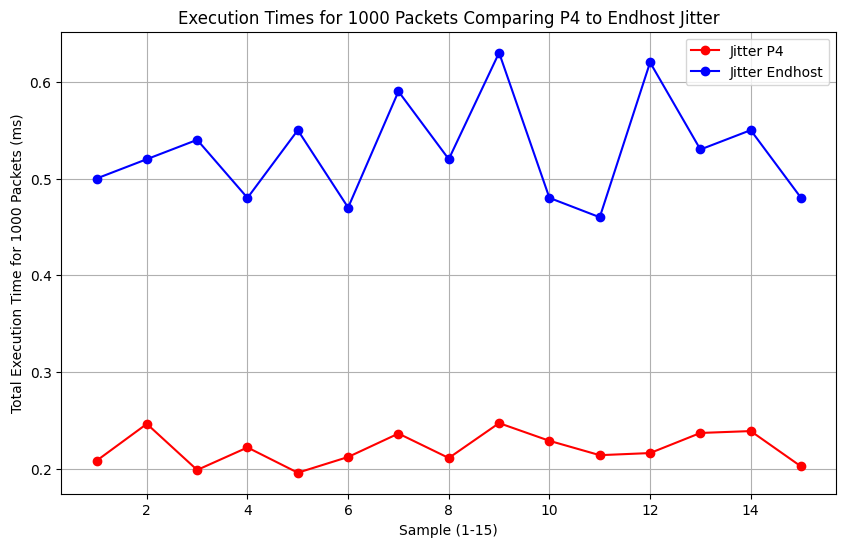

In [ ]:
plot_p4_vs_endhost_execution_times("Jitter", jitter_values_p4, jitter_values_endhost)

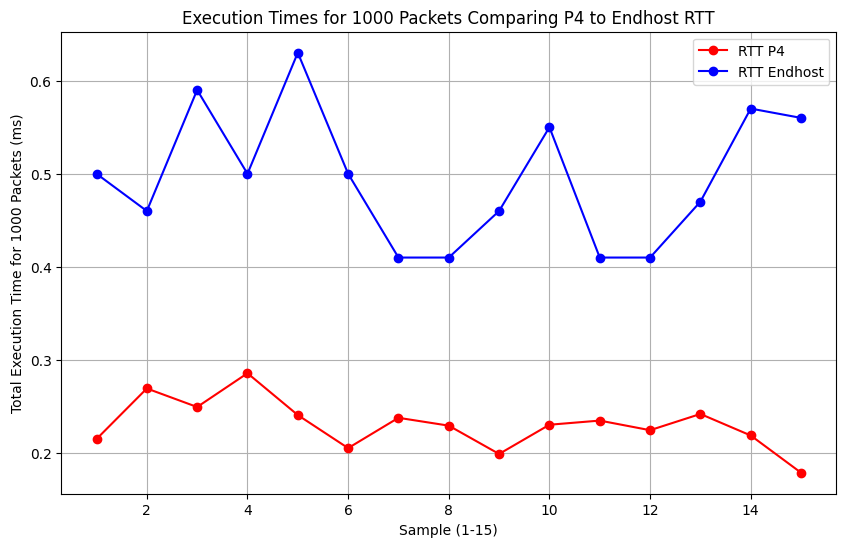

In [13]:
plot_p4_vs_endhost_execution_times("RTT", rtt_values_p4, rtt_values_endhost)

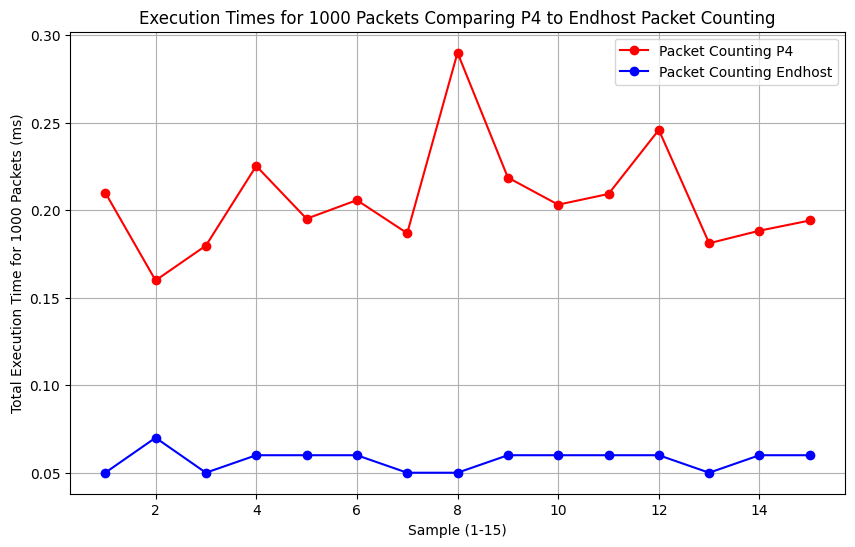

In [12]:
plot_p4_vs_endhost_execution_times("Packet Counting", packet_counting_values_p4, packet_counting_values_endhost)